In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow as tf
df=sns.load_dataset('diamonds')

df=pd.get_dummies(df,drop_first=True)
X=df.drop(['price'],axis=1)
y=df['price']


categoric_cols=['cut', 'color', 'clarity']
num_cols=['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler = RobustScaler()
early_stopping=EarlyStopping(patience=2)
#Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Then transform test data 
X_test_scaled = scaler.transform(X_test)

model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(64,
                        activation='relu',
                        input_shape=(X_train.shape[1],)),

    tf.keras.layers.Dense(64,
                        activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

history=model.fit(X_train,y_train,
          epochs=5,
          batch_size=3,
          verbose=1,
          callbacks=[early_stopping],
          validation_split=0.2)

#Evaluating The Model
loss=model.evaluate(X_test,y_test,verbose=1)


print('Mean_Squared_Error:', loss[0])
print('Mean_Absolute_Error:', loss[1])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc='upper right')
plt.show()


Epoch 1/5
11507/11507 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 7336071.0000 - mae: 1822.6499 - val_loss: 1993672.6250 - val_mae: 911.0543
Epoch 2/5
11507/11507 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 1442732.5000 - mae: 695.8363 - val_loss: 949916.4375 - val_mae: 573.4175
Epoch 3/5
11507/11507 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 1130367.0000 - mae: 563.8481 - val_loss: 801717.1250 - val_mae: 529.9166
Epoch 4/5
11507/11507 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 1009244.5000 - mae: 513.1776 - val_loss: 697370.9375 - val_mae: 457.4565
Epoch 5/5
11507/11507 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 905364.3750 - mae: 473.1366 - val_loss: 648158.0000 - val_mae: 440.1766
338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 636982.0000 - mae: 434.8719
Mean_Squared_Error: 636982.0
Mean_Absolute_Error: 434.8718566894531


TypeError: unhashable type: 'list'

<function matplotlib.pyplot.show(close=None, block=None)>

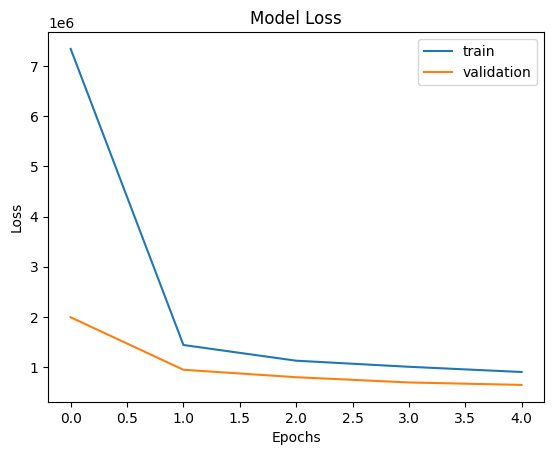

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'],loc='upper right')
plt.show